In [1]:
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()

In [2]:
# 입력 데이터와 타깃 데이터의 크기 확인하기
print(diabetes.data.shape, diabetes.target.shape)

(442, 10) (442,)


In [3]:
# 입력 데이터 샘플 3개만 출력해 보기
diabetes.data[:3]

# 샘플 하나당 10개의 특성을 갖는다 ~

array([[ 0.03807591,  0.05068012,  0.06169621,  0.02187235, -0.0442235 ,
        -0.03482076, -0.04340085, -0.00259226,  0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, -0.02632783, -0.00844872,
        -0.01916334,  0.07441156, -0.03949338, -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, -0.00567061, -0.04559945,
        -0.03419447, -0.03235593, -0.00259226,  0.00286377, -0.02593034]])

In [4]:
# 타깃 데이터 3개만 출력해 보기
diabetes.target[:3]

array([151.,  75., 141.])

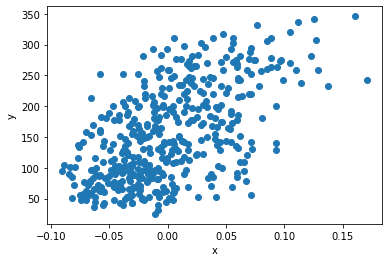

In [5]:
# 맷플롯립의 scatter( ) 함수로 산점도 그리기
# 샘플 하나 당 특성이 10개나 되기 때문에, 특성 한개 여기서는 세번째(인덱스=2) 특성에 대해서만 우선 살펴본다.
import matplotlib.pyplot as plt
plt.scatter(diabetes.data[:, 2], diabetes.target)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# 그래프를 보고 정비례 관계가 있구나~ 라고 생각해볼 수 있음 !

In [ ]:
# 입력 데이터의 세 번째 특성을 분리해서 변수에 저장해 두기
x = diabetes.data[:, 2]
y = diabetes.target